Import Libraries:

In [1]:
%matplotlib inline
# %matplotlib notebook
from sklearn.model_selection import train_test_split
import numpy as np
import qutip as qt
from sklearn.manifold import TSNE
from vae import * 

2023-03-17 14:21:59.994622: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-17 14:22:00.111004: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-17 14:22:00.113953: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-17 14:22:00.113968: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

# Noiseless Dataset

Load Dataset

In [2]:
n_angle = 101
n_samples = 1000
rho_arr = np.load('unitary_4x4_101_1000_noiseless.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)
concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

Define Hyperparameters:

In [3]:
batch_size = 64
beta = 0.0
learning_rate = 0.005
lat_dim = 1
hidden_act = "relu"
final_act = "tanh"

Load trained VAE:

In [4]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("encoder_noiseless.h5")
decoder.load_weights("decoder_noiseless.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

2023-03-08 18:45:05.789664: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-08 18:45:05.789681: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-08 18:45:05.789695: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (felix-Latitude-5521): /proc/driver/nvidia/version does not exist
2023-03-08 18:45:05.789837: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


790/790 [==============================] - 0s 421us/step


Investigate Latent Space

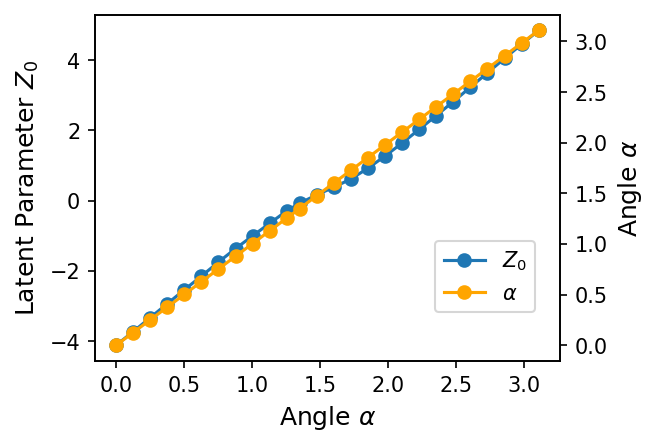

In [5]:
fig, ax = plt.subplots(figsize=(4, 3),dpi=150)

sort_inx = np.argsort(y_test)

ax.plot(y_test[sort_inx][::1000], (z_mean[sort_inx][:,0][::1000]),"-o", label="$Z_0$") 


ax2 = ax.twinx()

ax2.plot(y_test[sort_inx][::1000],y_test[sort_inx][::1000],"-o",c="orange", label= "$\\alpha$")

ax.set_ylabel("Latent Parameter $Z_0$",fontsize=12)
ax.set_xlabel("Angle $\\alpha$",fontsize=12)
ax2.set_ylabel("Angle $\\alpha$",fontsize=12)

fig.legend(bbox_to_anchor=(0.675, 0.4), loc=2)

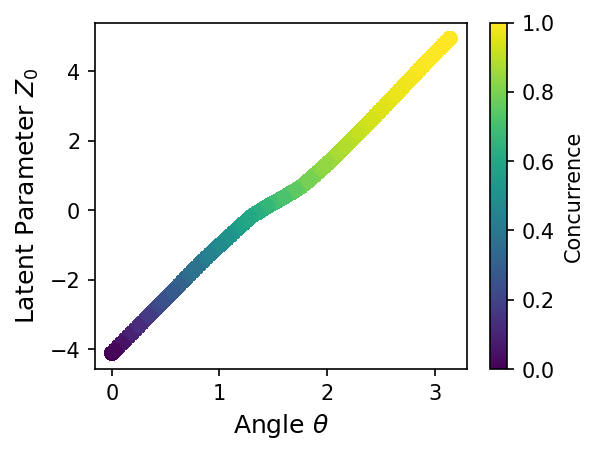

In [6]:
plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

# Noisy Dataset  $\beta = 0$

Load Dataset

In [7]:
n_angle = 101
n_samples = 1000
rho_arr = np.load('unitary_4x4_101_1000.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)
concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

Define Hyperparameters:

In [8]:
batch_size = 64
beta = 0.0
learning_rate = 0.005
lat_dim = 1
hidden_act = "tanh"
final_act = "linear"

Load trained VAE:

In [9]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("encoder_noise_0beta.h5")
decoder.load_weights("decoder_noise_0beta.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

790/790 [==============================] - 0s 430us/step


Investigate Latent Space

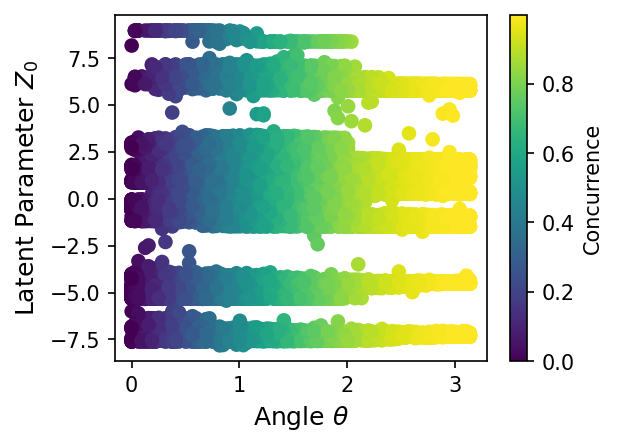

In [10]:
plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

# Noisy Dataset  $0.75\beta$

Load Dataset

In [2]:
n_angle = 101
n_samples = 1000
rho_arr = np.load('unitary_4x4_101_1000.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)
concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

Define Hyperparameters:

In [3]:
batch_size = 64
beta = 0.75
learning_rate = 0.005
lat_dim = 1
hidden_act = "tanh"
final_act = "linear"

Load trained VAE:

In [4]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("encoder_noise_075beta.h5")
decoder.load_weights("decoder_noise_075beta.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test[:2], epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

2023-03-17 14:22:24.112711: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-17 14:22:24.112736: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-17 14:22:24.112766: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (felix-Latitude-5521): /proc/driver/nvidia/version does not exist
2023-03-17 14:22:24.112992: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


790/790 [==============================] - 1s 639us/step


Investigate Latent Space

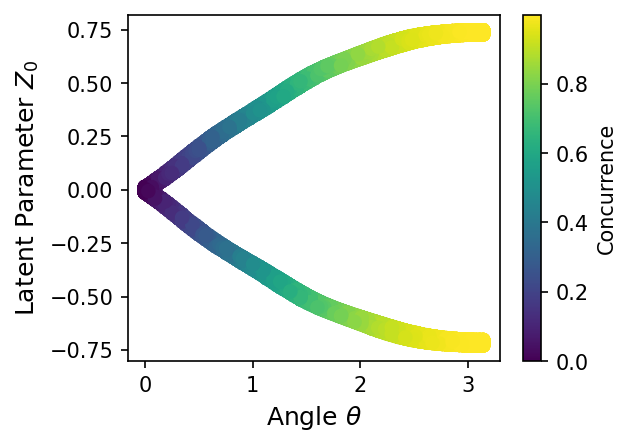

In [5]:
plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

Investigate generalization and relation to concurrence 


In [6]:
rho_arr_noiseless = np.load('unitary_4x4_101_1000_noiseless.npy', mmap_mode="r")
_, X_test_noiseless, _, y_test_noiseless = train_test_split(rho_arr_noiseless, alpha_arr, random_state=42)
z_mean_noiseless, _, _ = vae.encoder.predict(X_test_noiseless)

790/790 [==============================] - 1s 623us/step


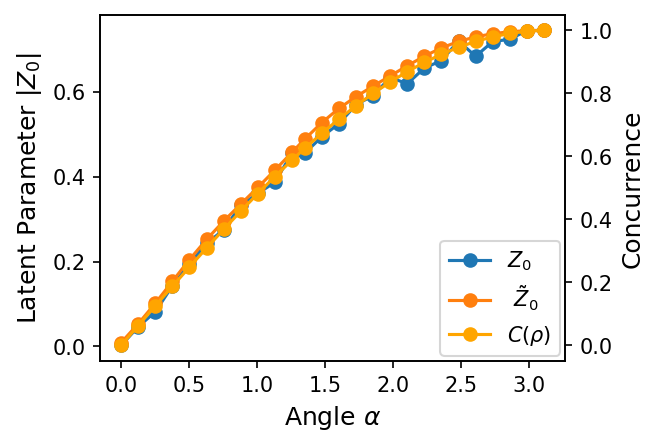

In [7]:
fig, ax = plt.subplots(figsize=(4, 3),dpi=150)

sort_inx = np.argsort(y_test)

ax.plot(y_test[sort_inx][::1000], np.abs(z_mean[sort_inx][:,0][::1000]),"-o", label="$Z_0$") 
ax.plot(y_test[sort_inx][::1000], z_mean_noiseless[sort_inx][:,0][::1000],"-o", label=" $\\tilde{Z}_0$") 


ax2 = ax.twinx()

ax2.plot(y_test[sort_inx][::1000],concurrence_arr[sort_inx][::1000],"-o",c="orange", label= "$C(\\rho)$")

ax.set_ylabel("Latent Parameter $|Z_0|$",fontsize=12)
ax.set_xlabel("Angle $\\alpha$",fontsize=12)
ax2.set_ylabel("Concurrence",fontsize=12)

fig.legend(bbox_to_anchor=(0.675, 0.4), loc=2)

In [8]:
rho_arr_deco = np.load('unitary_4x4_101_1000_deco_01.npy', mmap_mode="r")
_, X_test_deco, _, y_test_deco = train_test_split(rho_arr_deco, alpha_arr, random_state=42)
z_mean_deco, _, _ = vae.encoder.predict(X_test_deco)

concurrence_deco_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test_deco])

790/790 [==============================] - 1s 647us/step


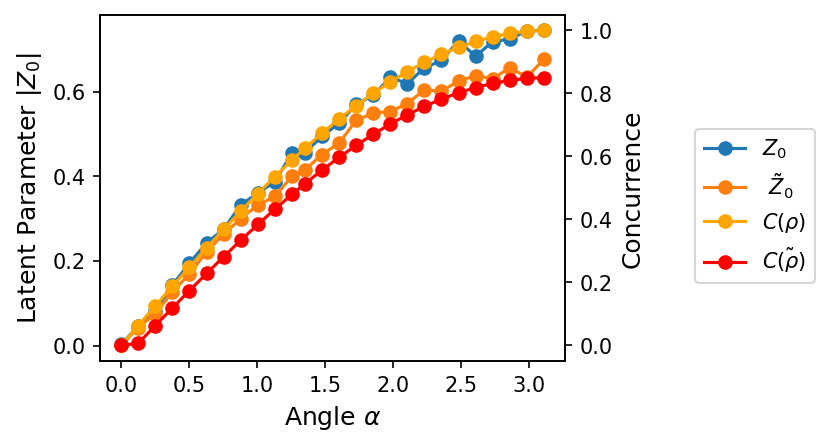

In [9]:
fig, ax = plt.subplots(figsize=(4, 3),dpi=150)

sort_inx = np.argsort(y_test)

ax.plot(y_test[sort_inx][::1000], np.abs(z_mean[sort_inx][:,0][::1000]),"-o", label="$Z_0$") 
ax.plot(y_test[sort_inx][::1000], np.abs(z_mean_deco[sort_inx][:,0][::1000]),"-o", label=" $\\tilde{Z}_0$") 


ax2 = ax.twinx()

ax2.plot(y_test[sort_inx][::1000],concurrence_arr[sort_inx][::1000],"-o",c="orange", label= "$C(\\rho)$")
ax2.plot(y_test[sort_inx][::1000],concurrence_deco_arr[sort_inx][::1000],"-o", c="red",label= "$\\tilde{C(\\rho)}$")


ax.set_ylabel("Latent Parameter $|Z_0|$",fontsize=12)
ax.set_xlabel("Angle $\\alpha$",fontsize=12)
ax2.set_ylabel("Concurrence",fontsize=12)

fig.legend(bbox_to_anchor=(1.1, 0.65), loc=2)

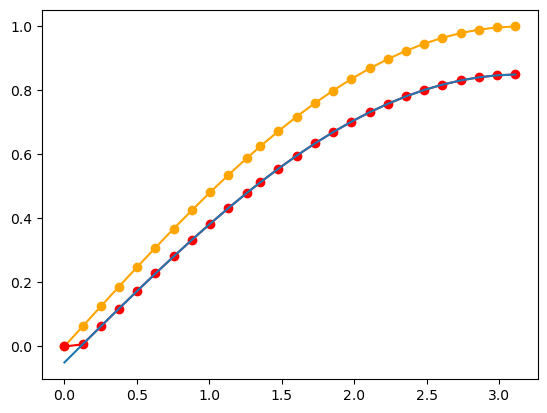

In [11]:
plt.plot(y_test[sort_inx][::1000],concurrence_arr[sort_inx][::1000],"-o",c="orange", label= "$C(\\rho)$")
plt.plot(y_test[sort_inx][::1000],concurrence_deco_arr[sort_inx][::1000],"-o", c="red",label= "$\\tilde{C(\\rho)}$")
plt.plot(y_test[sort_inx][::1000],(0.9)*concurrence_arr[sort_inx][::1000]-0.05)

# Multiple Experiments

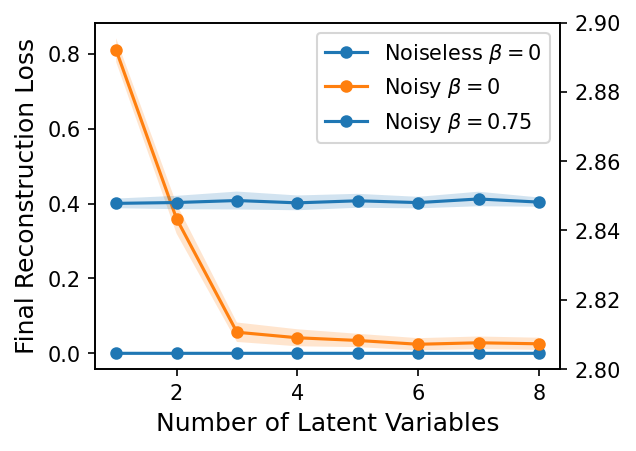

In [19]:
lat_arr = np.arange(1,9)
n_exp = 9


recon_loss_noiseless = np.zeros((len(lat_arr),n_exp, 1))
recon_loss_noise = np.zeros((len(lat_arr),n_exp, 1))
recon_loss_noise_075 = np.zeros((len(lat_arr),n_exp, 1))


for cnt_1, inx in enumerate(lat_arr):
    for cnt_2 in range(n_exp):
        read_dictionary = np.load('no_0beta_latent/history_{}_1_{}.npy'.format(inx,cnt_2),allow_pickle='TRUE').item()
        recon_loss_noiseless[cnt_1][cnt_2] = read_dictionary["reconstruction_loss"][-1]
        
        read_dictionary = np.load('noise_0beta_latent/history_{}_1_{}.npy'.format(inx,cnt_2),allow_pickle='TRUE').item()
        recon_loss_noise[cnt_1][cnt_2] = read_dictionary["reconstruction_loss"][-1]
        
        read_dictionary = np.load('noise_075beta_latent/history_{}_1_{}.npy'.format(inx,cnt_2),allow_pickle='TRUE').item()
        recon_loss_noise_075[cnt_1][cnt_2] = read_dictionary["reconstruction_loss"][-1]

av_recon_loss_arr_noiseless = np.average(recon_loss_noiseless,axis=1)
std_recon_loss_arr_noiseless = np.std(recon_loss_noiseless,axis=1)

av_recon_loss_arr_noise = np.average(recon_loss_noise,axis=1)
std_recon_loss_arr_noise = np.std(recon_loss_noise,axis=1)

av_recon_loss_arr_noise_075 = np.average(recon_loss_noise_075,axis=1)
std_recon_loss_arr_noise_075 = np.std(recon_loss_noise_075,axis=1)

fig, ax = plt.subplots(figsize=(4, 3),dpi=150)

ax2 = ax.twinx()
ax.plot(lat_arr, av_recon_loss_arr_noiseless, marker='o', markersize="5",label="Noiseless $\\beta=0$")
ax.fill_between(lat_arr, (av_recon_loss_arr_noiseless - std_recon_loss_arr_noiseless).flatten(), (av_recon_loss_arr_noiseless + std_recon_loss_arr_noiseless).flatten(), alpha=0.2)

ax.plot(lat_arr, av_recon_loss_arr_noise, marker='o', markersize="5",label="Noisy $\\beta=0$")
ax.fill_between(lat_arr, (av_recon_loss_arr_noise - std_recon_loss_arr_noise).flatten(), (av_recon_loss_arr_noise + std_recon_loss_arr_noise).flatten(), alpha=0.2)

ax2.plot(lat_arr, av_recon_loss_arr_noise_075, marker='o', markersize="5",label="Noisy $\\beta=0.75$")
ax2.fill_between(lat_arr, (av_recon_loss_arr_noise_075 - std_recon_loss_arr_noise_075).flatten(), (av_recon_loss_arr_noise_075 + std_recon_loss_arr_noise_075).flatten(), alpha=0.2)

ax2.set_ylim(2.8,2.9)

ax.set_xlabel("Number of Latent Variables",fontsize=12)
ax.set_ylabel("Final Reconstruction Loss",fontsize=12)
fig.legend(bbox_to_anchor=(0.9, 0.88))
plt.show()

# Beta Scan

In [29]:
def kl_loss(mu,sig):
    return -0.5 * (1 + sig - mu**2 - np.exp(sig))

In [4]:
n_angle = 101
n_samples = 1000
rho_arr = np.load('unitary_4x4_101_1000.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)
concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

In [22]:
batch_size = 64
learning_rate = 0.005
lat_dim = 8
hidden_act = "tanh"
final_act = "linear"

In [23]:
inx_dict = {"001":0.01,"01":0.1,"02":0.2,"03":0.3,
            "04":0.4,"05":0.5,"06":0.6,"07":0.7,
            "08":0.8,"09":0.9,"10":1.0,"11":1.1, "12":1.2}

In [26]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("grid_8/encoder_{}_grid_8.h5".format("06"))
decoder.load_weights("grid_8/decoder_{}_grid_8.h5".format("06"))

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
history_dict = vae.fit(X_test, epochs=1, batch_size=64, verbose=0) 

In [27]:
z_mean, z_log_var, z = vae.encoder.predict(X_test)

790/790 [==============================] - 1s 646us/step


In [30]:
for i in range(8):
        print(np.average(kl_loss(z_mean[:,i], z_log_var[:,i]))) 

0.00015728168
0.00026049095
4.6940336e-06
4.453617e-05
4.820446e-06
2.143877e-05
0.20096588
4.5776782e-05


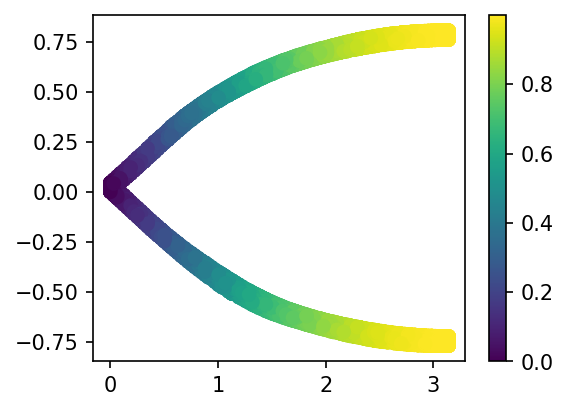

In [32]:
plot_scatter(y_test, z_mean[:,-2],concurrence_arr,"","","",1)

In [7]:
recon_loss_arr = np.zeros(len(inx_dict))
kl_loss_arr = np.zeros(len(inx_dict))
full_kl_loss_arr = np.zeros((len(inx_dict),8))

cnt = 0
for inx,beta in inx_dict.items():

    encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

    encoder.load_weights("grid_8/encoder_{}_grid_8.h5".format(inx))
    decoder.load_weights("grid_8/decoder_{}_grid_8.h5".format(inx))

    vae = VAE(encoder, decoder, beta)
    vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
    history_dict = vae.fit(X_test, epochs=1, batch_size=64, verbose=0) 

    recon_loss_arr[cnt] = history_dict.history["reconstruction_loss"][0]
    kl_loss_arr[cnt] = history_dict.history["kl_loss"][0]
    
    
    z_mean, z_log_var, z = vae.encoder.predict(X_test)
    
    for i in range(8):
        full_kl_loss_arr[cnt][i] = np.average(kl_loss(z_mean[:,i], z_log_var[:,i]))
    cnt += 1 
    
    
    
#     plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"$Z_0$","$Z_1$","",1)

2023-03-15 17:57:29.919330: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-15 17:57:29.919351: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-15 17:57:29.919388: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (felix-Latitude-5521): /proc/driver/nvidia/version does not exist
2023-03-15 17:57:29.919599: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


790/790 [==============================] - 1s 628us/step


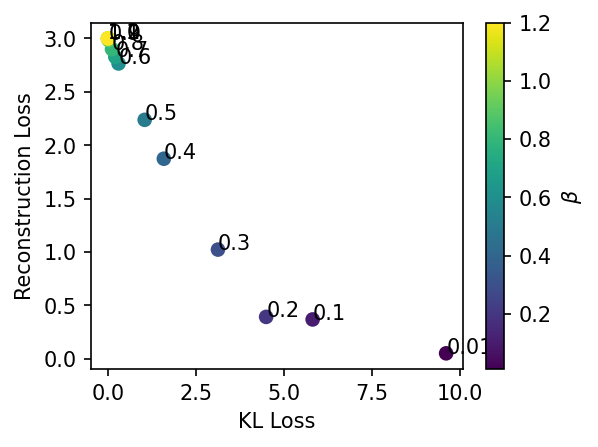

In [8]:
fig, ax = plt.subplots(figsize=(4, 3),dpi=150)
im = ax.scatter(kl_loss_arr, recon_loss_arr, c=list(inx_dict.values()))
cbar = fig.colorbar(im)
cbar.set_label("$\\beta$")
plt.xlabel("KL Loss")
plt.ylabel("Reconstruction Loss")


for i, txt in enumerate(inx_dict.values()):
    ax.annotate(txt, (kl_loss_arr[i], recon_loss_arr[i]))

plt.show()

In [12]:
["$Z_{7}$","$Z_{6}$","$Z_{5}$","$Z_{4}$","$Z_{3}$","$Z_{2}$","$Z_{1}$","$Z_{0}$"]

beta_list = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2]

In [17]:
new_matrix




(13, 8)

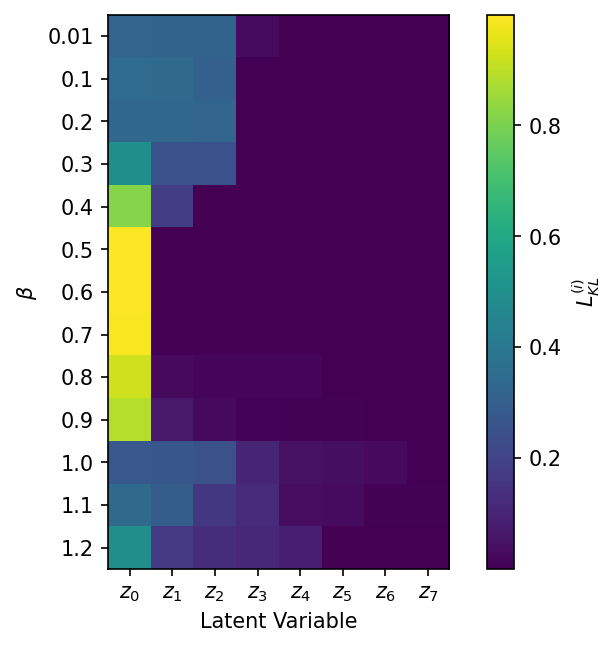

In [37]:
row_sums = np.sort(full_kl_loss_arr,axis=-1).sum(axis=1)
new_matrix = np.sort(full_kl_loss_arr,axis=-1) / row_sums[:, np.newaxis]

fig, ax = plt.subplots(dpi=150)
im = ax.imshow(np.flip(new_matrix,axis=1))
cbar = fig.colorbar(im)
cbar.set_label("$L_{KL}^{(i)}$")
plt.xticks(range(8),["$z_{}$".format(i) for i in range(lat_dim)])
plt.yticks(range(len(inx_dict)),beta_list)

plt.xlabel("Latent Variable")
plt.ylabel("$\\beta$")

plt.show()

# 3 LV with ramp

In [8]:
batch_size = 64
beta = 0.75
learning_rate = 0.005
lat_dim = 3
hidden_act = "tanh"
final_act = "linear"

In [9]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/vae/encoder_3lv_0beta_ramp.h5")
decoder.load_weights("/home/felix/Downloads/vae/decoder_3lv_0beta_ramp.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test[:2], epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

790/790 [==============================] - 0s 542us/step


<IPython.core.display.Javascript object>


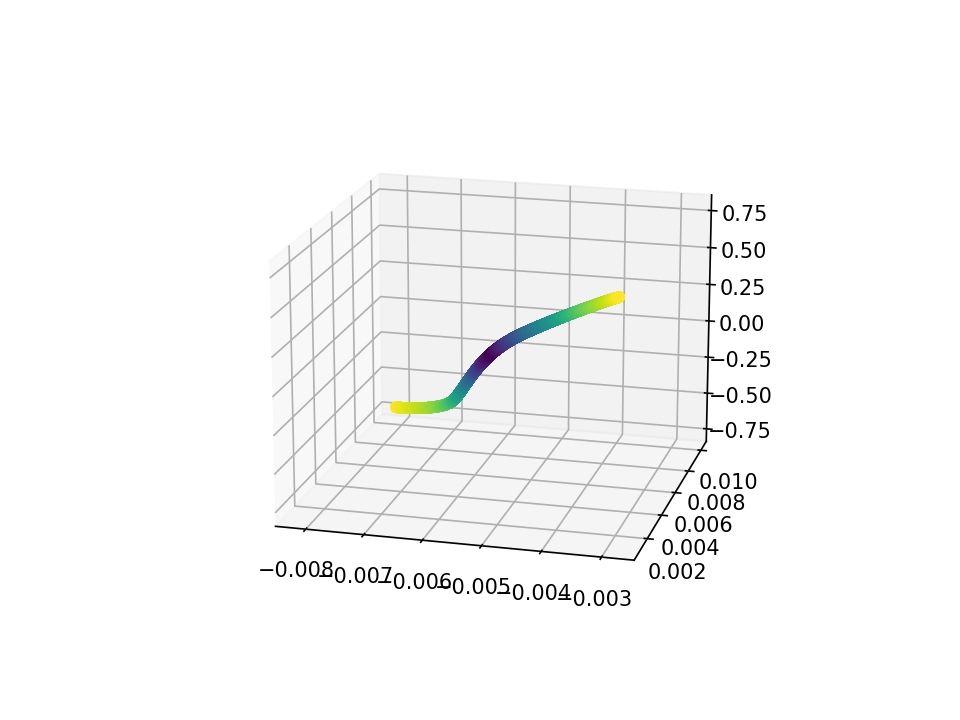

In [10]:
fig = plt.figure(dpi = 150)
ax = fig.add_subplot(projection='3d')
ax.scatter(z_mean[:,0], z_mean[:,1],z_mean[:,2], c=concurrence_arr,alpha=1)

<IPython.core.display.Javascript object>


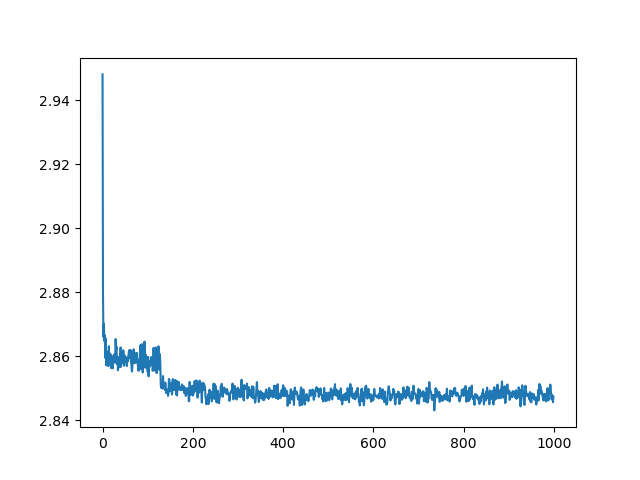

In [16]:
read_dictionary = np.load('/home/felix/Downloads/vae/history_3lv_0beta_ramp.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"])
        

# 3 LV with ramp

In [2]:
batch_size = 64
beta = 0.0
learning_rate = 0.005
lat_dim = 3
hidden_act = "tanh"
final_act = "linear"

In [6]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/vae/encoder_3lv_00beta_ramp.h5")
decoder.load_weights("/home/felix/Downloads/vae/decoder_3lv_00beta_ramp.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test[:2], epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

790/790 [==============================] - 1s 654us/step


In [ ]:
plot_scatter(y_test,z_mean[:,1],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

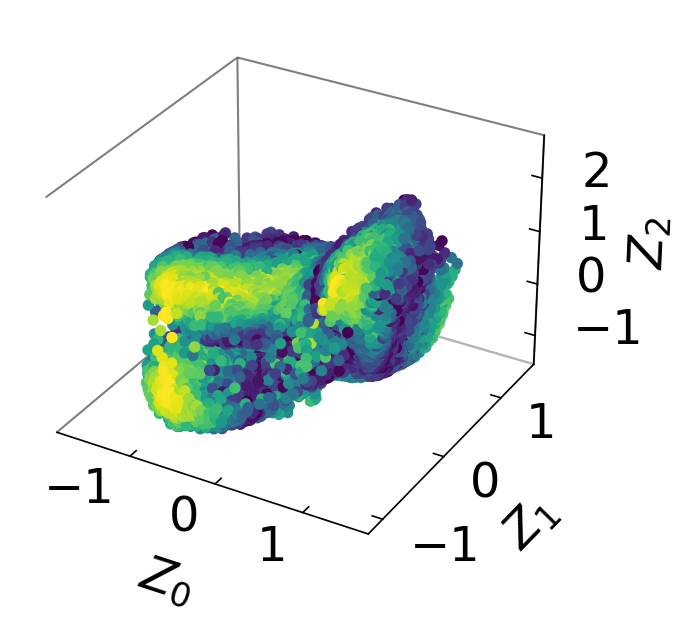

In [25]:
from matplotlib import rc
from matplotlib.ticker import MultipleLocator 


fig = plt.figure(dpi = 150)
ax = fig.add_subplot(projection='3d')
ax.scatter(z_mean[:,0], z_mean[:,1],z_mean[:,2], c=concurrence_arr,alpha=1)

ax.set_xlabel("\n$Z_0$")
ax.set_ylabel("\n$Z_1$")
ax.set_zlabel("\n$Z_2$")

rc('font',size=23)
# rc('font',family='serif')
rc('axes',labelsize=23)

[t.set_va('center') for t in ax.get_yticklabels()]
[t.set_ha('left') for t in ax.get_yticklabels()]
[t.set_va('center') for t in ax.get_xticklabels()]
[t.set_ha('right') for t in ax.get_xticklabels()]
[t.set_va('center') for t in ax.get_zticklabels()]
[t.set_ha('left') for t in ax.get_zticklabels()]

ax.grid(False)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis._axinfo['tick']['inward_factor'] = 0
ax.xaxis._axinfo['tick']['outward_factor'] = 0.4
ax.yaxis._axinfo['tick']['inward_factor'] = 0
ax.yaxis._axinfo['tick']['outward_factor'] = 0.4
ax.zaxis._axinfo['tick']['inward_factor'] = 0
ax.zaxis._axinfo['tick']['outward_factor'] = 0.4
ax.zaxis._axinfo['tick']['outward_factor'] = 0.4

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.zaxis.set_major_locator(MultipleLocator(1))
# ax.dist = 8

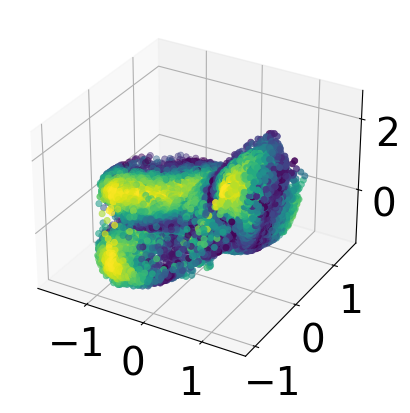

In [9]:
ax = plt.axes(projection='3d')
ax.scatter(z_mean[:,0], z_mean[:,1],z_mean[:,2], c=concurrence_arr, linewidth=0.5);

/home/felix/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/felix/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<IPython.core.display.Javascript object>


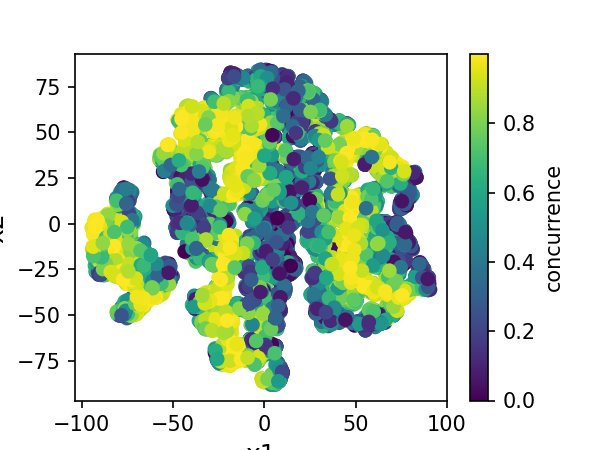

In [21]:
tsne = TSNE()
X_embedded = tsne.fit_transform(z_mean[:10000])
plot_scatter(X_embedded[:,0], X_embedded[:,1] , concurrence_arr[:10000],"x1","x2","concurrence", 1)

# 3 LV without ramp

In [101]:
batch_size = 64
beta = 0.00
learning_rate = 0.005
lat_dim = 3
hidden_act = "tanh"
final_act = "linear"

In [145]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/vae/encoder_3lv_00beta_noramp.h5")
decoder.load_weights("/home/felix/Downloads/vae/decoder_3lv_00beta_noramp.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test[:2], epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

790/790 [==============================] - 0s 496us/step


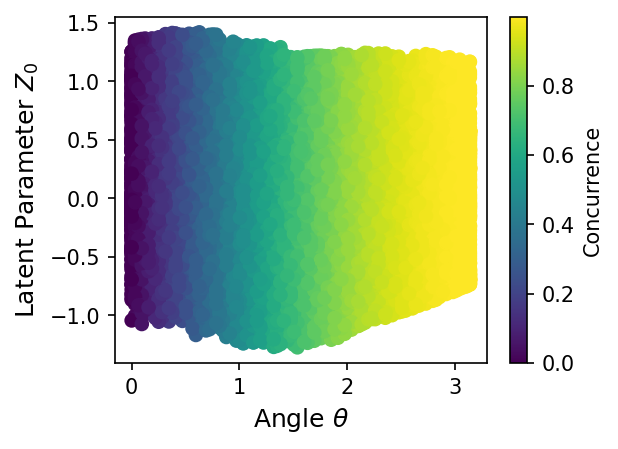

In [146]:
plot_scatter(y_test,z_mean[:,1],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

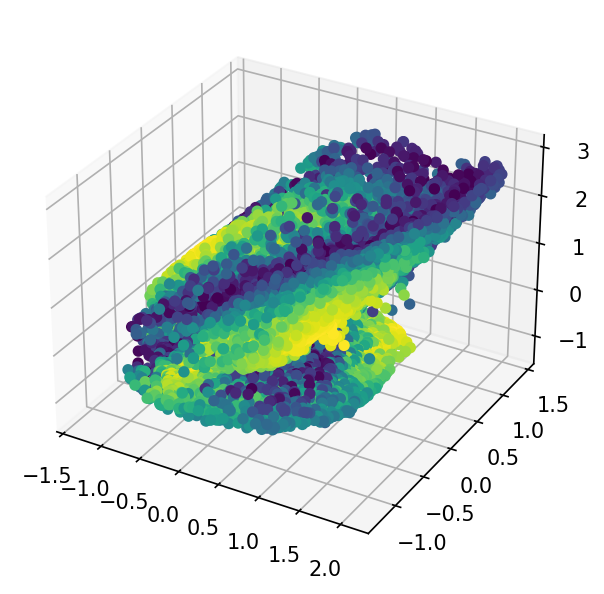

In [147]:
fig = plt.figure(dpi = 150)
ax = fig.add_subplot(projection='3d')
ax.scatter(z_mean[:,0], z_mean[:,1],z_mean[:,2], c=concurrence_arr,alpha=1)

# 8 LV with ramp

In [125]:
batch_size = 64
beta = 0.0
learning_rate = 0.005
lat_dim = 8
hidden_act = "tanh"
final_act = "linear"

In [138]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/vae/encoder_8lv_00beta_ramp.h5")
decoder.load_weights("/home/felix/Downloads/vae/decoder_8lv_00beta_ramp.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test[:2], epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

790/790 [==============================] - 0s 529us/step


/home/felix/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/felix/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


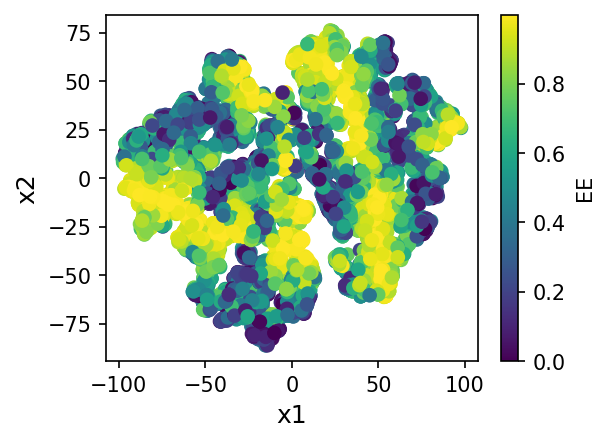

In [140]:
tsne = TSNE()
X_embedded = tsne.fit_transform(z_mean[:10000])
plot_scatter(X_embedded[:,0], X_embedded[:,1] , concurrence_arr[:10000],"x1","x2","concurrence", 1)

# 8 LV without ramp

In [133]:
batch_size = 64
beta = 0.0
learning_rate = 0.005
lat_dim = 8
hidden_act = "tanh"
final_act = "linear"

In [134]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/vae/encoder_8lv_00beta_noramp.h5")
decoder.load_weights("/home/felix/Downloads/vae/decoder_8lv_00beta_noramp.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test[:2], epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

790/790 [==============================] - 0s 534us/step


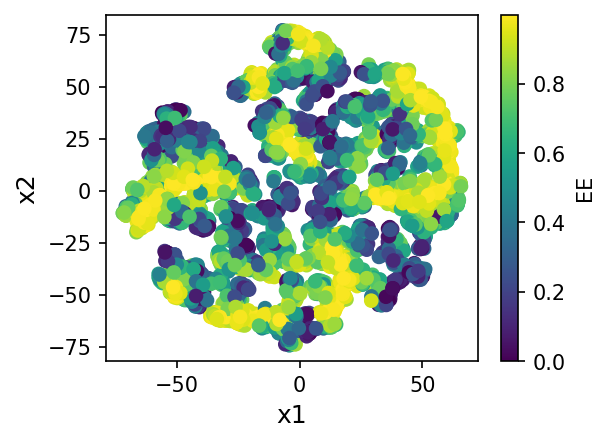

In [136]:
tsne = TSNE()
X_embedded = tsne.fit_transform(z_mean[:5000])
plot_scatter(X_embedded[:,0], X_embedded[:,1] , concurrence_arr[:5000],"x1","x2","EE", 1)